# **Clustering K-Means** 


## **Pengertian**

Algoritma K-Means merupakan salah satu algoritma Clustering yang masuk ke dalam kelompok Unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok dengan sistem partisi sehingga data yang berkarakteristik sama dimasukkan ke dalam satu kelompok yang sama

## **Algoritma K-Means**

1.	Menentukan jumlah cluster yang akan dibentuk
2. 	Menentukan titik pusat cluster (centroid) secara acak
3. 	Menghitung jarak masing-masing data ke pusat cluster kemudian memasukan data tersebut ke cluster tertentu jika memiliki jarak terdekat (jarak yang nilainya rendah)
4.	Menentukan pusat cluster baru dengan menghitung rata-rata dari anggota cluster
5.	Mengulangi langkah ketiga dan keempat hingga tidak ada data yang berpindah tempat.


## **Implementasi Code**

import modul

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Menampilkan dataset

In [ ]:
url = "https://raw.githubusercontent.com/HanifSantoso05/dataset_matkul/main/Iris.csv"
#colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
air = pd.read_csv(url)
air.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Menentukan fitur yang akan dikelompokkan. 

Disini fitur yang akan digunakan adalah SepalLengthCm, SepalWidthCm, PetalLengthCm,	PetalWidthCm 

In [ ]:
air_x = air.iloc[:, 0:4]
air_x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


Mengubah dataframe ke dalam bentuk array

In [ ]:
x_array = np.array(air_x)
print(x_array)

Melakukan normalisasi data dengan menggunakan metode *Min Max Scaler*. 

Normalisasi data digunakan untuk memperkecil jarak antar sehingga memudahkan dalam proses perhitungan.

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled
dataframe= pd.DataFrame(x_scaled, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
print (dataframe)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.000000      0.222222       0.625000      0.067797
1         0.006711      0.166667       0.416667      0.067797
2         0.013423      0.111111       0.500000      0.050847
3         0.020134      0.083333       0.458333      0.084746
4         0.026846      0.194444       0.666667      0.067797
..             ...           ...            ...           ...
145       0.973154      0.666667       0.416667      0.711864
146       0.979866      0.555556       0.208333      0.677966
147       0.986577      0.611111       0.416667      0.711864
148       0.993289      0.527778       0.583333      0.745763
149       1.000000      0.444444       0.416667      0.694915

[150 rows x 4 columns]


Menentukan dan mengonfigurasi fungsi k-means dengan mengelompokkan data menjadi 3 cluster

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

In [ ]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

Menentukan nilai centroid

In [ ]:
print(kmeans.cluster_centers_)

[[0.16442953 0.19611111 0.59083333 0.07864407]
 [0.84670531 0.67171717 0.4280303  0.78582435]
 [0.52720518 0.44543651 0.3125     0.56476998]]


Menambahkan kolom cluster pada dataframe

In [ ]:
air["kluster"] = kmeans.labels_

Visualisasi hasil clustering

**Cara 1**

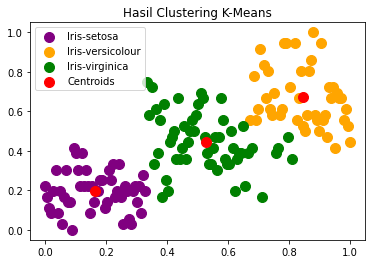

In [ ]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

**Cara 2**

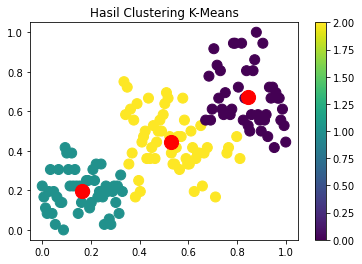

In [ ]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Clustering K-Means")
plt.colorbar (output)
plt.show()